# Multi Layer Perceptron (MLP)

>### [예제 2] 2 Input Logic Gate(Logistic Regression) - MLP

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
# Logistic regression : Logic Gate Truth Table
x_input = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]],dtype=tf.float32)
# labels = tf.constant([[0], [0], [0], [1]],dtype=tf.float32)  # Gate : AND
# labels = tf.constant([[0], [1], [1], [1]],dtype=tf.float32)  # Gate : OR
# labels = tf.constant([[1], [1], [1], [0]],dtype=tf.float32)  # Gate : NAND
# labels = tf.constant([[1], [0], [0], [0]],dtype=tf.float32)  # Gate : NOR
labels = tf.constant([[0], [1], [1], [0]],dtype=tf.float32)  # Gate : XOR

# Weight, Bias
W0 = tf.Variable(tf.random.normal((2, 2), dtype=tf.float32))
B0 = tf.Variable(tf.random.normal((1, 2), dtype=tf.float32))

W1 = tf.Variable(tf.random.normal((2, 1), dtype=tf.float32))
B1 = tf.Variable(tf.random.normal((1, 1), dtype=tf.float32))

>## Hypothesis

In [3]:
# Hyoithesis, Cost, Optimizer
def Hypothesis(x):
  hidden = tf.sigmoid(tf.matmul(x, W0) + B0)  
  return tf.sigmoid(tf.matmul(hidden, W1) + B1)

eps = 1e-7  # prevent log(0) => infinite
def Cost():
  return -tf.reduce_mean(labels * tf.math.log(Hypothesis(x_input)+eps) + (1 - labels) * tf.math.log(1 - Hypothesis(x_input) + eps)) 

### 학습 (Training)

In [4]:
%%time

epochs = 50000
learning_rate = 0.1
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)
check = np.array([0, epochs*0.01, epochs*0.1, epochs*0.4, epochs*0.6, epochs])
w_trained = []
b_trained = []
check_idx = 0

for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
    print("[{:>5}] cost = {:>10.4}".format(cnt, cost_graph[cnt]))
  if check[check_idx] == cnt:
    w_trained.append(W0.numpy())
    b_trained.append(B0.numpy())
    check_idx += 1

  optimizer.minimize(Cost, [W0, W1, B0, B1])

[    0] cost =     0.8279
[ 2500] cost =     0.5844
[ 5000] cost =    0.06101
[ 7500] cost =    0.02468
[10000] cost =    0.01518
[12500] cost =     0.0109
[15000] cost =   0.008484
[17500] cost =   0.006935
[20000] cost =   0.005859
[22500] cost =    0.00507
[25000] cost =   0.004466
[27500] cost =    0.00399
[30000] cost =   0.003604
[32500] cost =   0.003287
[35000] cost =    0.00302
[37500] cost =   0.002793
[40000] cost =   0.002597
[42500] cost =   0.002427
[45000] cost =   0.002278
[47500] cost =   0.002146
[50000] cost =   0.002028
CPU times: user 2min 38s, sys: 64.2 ms, total: 2min 38s
Wall time: 2min 39s


>### Training Test

In [5]:
# Training 상황에 대한 그래프 출력
print("[Training Test]")
y = Hypothesis(x_input).numpy()
y = y.reshape((-1,))
Y = [int(y_elem>0.5) for y_elem in y]
for idx in range(x_input.shape[0]):
    print("Input {} , Target : {} => Y :{:>2}(y:{:>5.2})".format(x_input[idx], labels[idx], Y[idx], y[idx]))

[Training Test]
Input [0. 0.] , Target : [0.] => Y : 0(y:0.0019)
Input [0. 1.] , Target : [1.] => Y : 1(y:  1.0)
Input [1. 0.] , Target : [1.] => Y : 1(y:  1.0)
Input [1. 1.] , Target : [0.] => Y : 0(y:0.0017)


> ### Ploting : Cost/Training Count

<function matplotlib.pyplot.show>

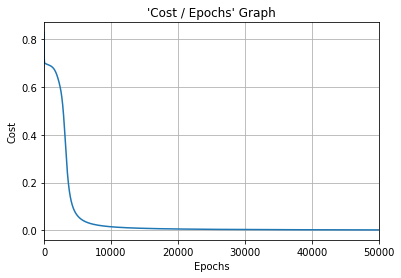

In [6]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.show

> ### Decesion boundary

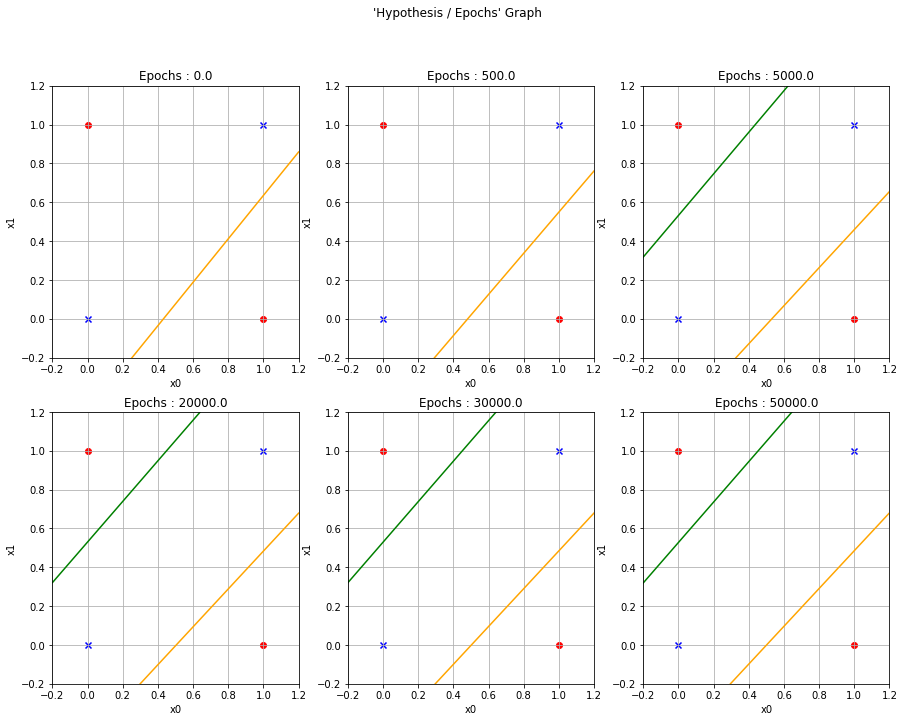

In [7]:
# 구분선 그리기
x_decision = np.linspace(-0.2, 1.2, 1000)

fig, ax = plt.subplots(2, 3, figsize=(15, 11))
fig.suptitle("'Hypothesis / Epochs' Graph")

for ax_idx in range(check.size):
    W = w_trained[ax_idx]
    B = b_trained[ax_idx]
    y_decision1 = -(W[0][0] * x_decision + B[0][0])/W[1][0] 
    y_decision2 = -(W[0][1] * x_decision + B[0][1])/W[1][1] 

    #   label의 값에 따라서 blue 또는 red 점 찍기
    for i in range(labels.shape[0]):
        if(labels[i][0] == 0):
            ax[ax_idx // 3][ax_idx % 3].scatter(x_input[i][0], x_input[i][1], color='blue', marker="x")
        else:
            ax[ax_idx // 3][ax_idx % 3].scatter(x_input[i][0], x_input[i][1], color='red', marker="o")
   
    ax[ax_idx // 3][ax_idx % 3].plot(x_decision, y_decision1, color='green')
    ax[ax_idx // 3][ax_idx % 3].plot(x_decision, y_decision2, color='orange')

    ax[ax_idx // 3][ax_idx % 3].set_title("Epochs : {}".format(check[ax_idx]))
    ax[ax_idx // 3][ax_idx % 3].set_xlim((-0.2, 1.2))
    ax[ax_idx // 3][ax_idx % 3].set_ylim((-0.2, 1.2))
    ax[ax_idx // 3][ax_idx % 3].set_xlabel("x0")
    ax[ax_idx // 3][ax_idx % 3].set_ylabel("x1")
    ax[ax_idx // 3][ax_idx % 3].grid(True)
    
plt.show()